### Capstone 20.6 Step 5 - Data Wrangling & Exploration

In [1]:
import pandas as pd
import numpy as np
import json
import re
import matplotlib.pyplot as plt

Datasets

https://www.kaggle.com/datasets/ankurzing/sentiment-analysis-for-financial-news for 'financial_news.csv'

https://www.kaggle.com/datasets/ankurzing/aspect-based-sentiment-analysis-for-financial-news for 'financial_news_multiple_entity.csv'

https://huggingface.co/datasets/zeroshot/twitter-financial-news-sentiment for 'twitter_financial_news_train.csv' and 'twitter_financial_news_valid.csv'

In [2]:
# Data Cleaning for 'financial_news.csv'

fin_news_df = pd.read_csv('financial_news.csv', header=None, encoding='latin-1')

fin_news_df.columns = ['Sentiment', 'News Headline']
fin_news_df_reindex = fin_news_df.reindex(columns=['News Headline', 'Sentiment'])
fin_news_df_reindex.index = np.arange(1, len(fin_news_df_reindex) + 1)
fin_news_df_final = fin_news_df_reindex

unique_sentiments = fin_news_df_final['Sentiment'].unique()
display(unique_sentiments)   # Only 3 values seen which is good - ['neutral', 'negative', 'positive']

display(fin_news_df_final)

array(['neutral', 'negative', 'positive'], dtype=object)

,News Headline,Sentiment
1,"According to Gran , the company has no plans t...",neutral
2,Technopolis plans to develop in stages an area...,neutral
3,The international electronic industry company ...,negative
4,With the new production plant the company woul...,positive
5,According to the company 's updated strategy f...,positive
...,...,...
4842,LONDON MarketWatch -- Share prices ended lower...,negative
4843,Rinkuskiai 's beer sales fell by 6.5 per cent ...,neutral
4844,Operating profit fell to EUR 35.4 mn from EUR ...,negative
4845,Net sales of the Paper segment decreased to EU...,negative


In [3]:
# Data Cleaning for 'financial_news_multiple_entity.csv'

fin_news_mult_ent_df = pd.read_csv('financial_news_multiple_entity.csv')

fin_news_mult_ent_df = fin_news_mult_ent_df.drop('S No.', axis=1)
fin_news_mult_ent_df.columns = ['News Headline', 'Decisions', 'Words']
fin_news_mult_ent_df.index = np.arange(1, len(fin_news_mult_ent_df) + 1)

def rev_dict(d):
    #return({v: k for k, v in json.loads(d).items()})
    new_dict = {v: k for k, v in json.loads(d).items()}
    length = len(new_dict.values())
    #return(new_dict, length)
    if length == 1:
        return(list(new_dict.keys())[0])
    else:
        return("")
    
fin_news_mult_ent_df['Sentiment'] = fin_news_mult_ent_df['Decisions'].apply(rev_dict)

'''
### Alternative Technique ###

dictionaries = fin_news_mult_ent_df_final['Decisions'].tolist()
#print(fin_news_mult_ent_df_final)

count = 0
sentiment_list = []
for text in dictionaries:
    #print(text)
    count += 1
    sentiments = re.findall(r'(neutral|negative|positive)', text)
    if sentiments:
        sentiment_set = set(sentiments)
        if len(sentiment_set) == 1:
            sentiment_list.append(sentiments)
            #print(sentiment_list)   # Will cause VSCode to crash
        else:
            sentiment_list.append('')

    #if count == 15:   # Loop ends after 15 rows
    #    break
print(sentiment_list)

fin_news_mult_ent_df_final['Sentiment'] = sentiment_list
fin_news_mult_ent_df_final['Sentiment'] = fin_news_mult_ent_df_final['Sentiment'].astype(str).str.strip("[]'")
'''

display(fin_news_mult_ent_df.head(15))

fin_news_mult_ent_df['Sentiment'].replace('', np.nan, inplace=True)
fin_news_mult_ent_df.dropna(subset=['Sentiment'], inplace=True)
fin_news_mult_ent_df_final = fin_news_mult_ent_df

display(fin_news_mult_ent_df_final)


,News Headline,Decisions,Words,Sentiment
1,SpiceJet to issue 6.4 crore warrants to promoters,"{""SpiceJet"": ""neutral""}",8,neutral
2,MMTC Q2 net loss at Rs 10.4 crore,"{""MMTC"": ""neutral""}",8,neutral
3,"Mid-cap funds can deliver more, stay put: Experts","{""Mid-cap funds"": ""positive""}",8,positive
4,Mid caps now turn into market darlings,"{""Mid caps"": ""positive""}",7,positive
5,"Market seeing patience, if not conviction: Pra...","{""Market"": ""neutral""}",8,neutral
6,Infosys: Will the strong volume growth sustain?,"{""Infosys"": ""neutral""}",7,neutral
7,Hudco raises Rs 279 cr via tax-free bonds,"{""Hudco"": ""positive""}",8,positive
8,HOEC could retest 30-35 levels: Ashwani Gujral,"{""HOEC"": ""neutral""}",7,neutral
9,Gold shines on seasonal demand; Silver dull,"{""Gold"": ""positive"", ""Silver"": ""negative""}",7,
10,Genpact appoints Edward J Fitzpatrick as CFO,"{""Genpact"": ""neutral""}",7,neutral


C:\Users\Kevin\AppData\Local\Temp\ipykernel_17424\1738243404.py:51: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fin_news_mult_ent_df['Sentiment'].replace('', np.nan, inplace=True)


,News Headline,Decisions,Words,Sentiment
1,SpiceJet to issue 6.4 crore warrants to promoters,"{""SpiceJet"": ""neutral""}",8,neutral
2,MMTC Q2 net loss at Rs 10.4 crore,"{""MMTC"": ""neutral""}",8,neutral
3,"Mid-cap funds can deliver more, stay put: Experts","{""Mid-cap funds"": ""positive""}",8,positive
4,Mid caps now turn into market darlings,"{""Mid caps"": ""positive""}",7,positive
5,"Market seeing patience, if not conviction: Pra...","{""Market"": ""neutral""}",8,neutral
...,...,...,...,...
10747,"Gram, masoor decline on subdued demand","{""Gram"": ""negative"", ""masoor"": ""negative""}",6,negative
10748,"Jeera, pepper decline on subdued demand","{""Jeera"": ""negative"", ""pepper"": ""negative""}",6,negative
10749,"Negative on Chambal, Advanta: Mitesh Thacker","{""Chambal"": ""negative"", ""Advanta"": ""negative""}",6,negative
10750,"Small, Mid-cap stocks may emerge outperformers","{""Small"": ""positive"", ""Mid-cap stocks"": ""posit...",6,positive


In [4]:
# Data Cleaning for 'twitter_financial_news_train.csv'

twitter_fin_news_train_df = pd.read_csv('twitter_financial_news_train.csv')
twitter_fin_news_train_df.columns = ['News Headline', 'Label']
twitter_fin_news_train_df_final = twitter_fin_news_train_df

conditions = [
    twitter_fin_news_train_df_final['Label'] == 0,
    twitter_fin_news_train_df_final['Label'] == 1,
    twitter_fin_news_train_df_final['Label'] == 2
]

categories = ['negative', 'positive', 'neutral']

twitter_fin_news_train_df_final['Sentiment'] = np.select(conditions, categories, default='')

display(twitter_fin_news_train_df_final)

,News Headline,Label,Sentiment
0,$BYND - JPMorgan reels in expectations on Beyo...,0,negative
1,$CCL $RCL - Nomura points to bookings weakness...,0,negative
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ...",0,negative
3,$ESS: BTIG Research cuts to Neutral https://t....,0,negative
4,$FNKO - Funko slides after Piper Jaffray PT cu...,0,negative
...,...,...,...
9538,The Week's Gainers and Losers on the Stoxx Eur...,2,neutral
9539,Tupperware Brands among consumer gainers; Unil...,2,neutral
9540,vTv Therapeutics leads healthcare gainers; Myo...,2,neutral
9541,"WORK, XPO, PYX and AMKR among after hour movers",2,neutral


In [5]:
# Data Cleaning for 'twitter_financial_news_valid.csv'

twitter_fin_news_valid_df = pd.read_csv('twitter_financial_news_valid.csv')
twitter_fin_news_valid_df.columns = ['News Headline', 'Label']
twitter_fin_news_valid_df_final = twitter_fin_news_valid_df

conditions = [
    twitter_fin_news_valid_df_final['Label'] == 0,
    twitter_fin_news_valid_df_final['Label'] == 1,
    twitter_fin_news_valid_df_final['Label'] == 2
]

categories = ['negative', 'positive', 'neutral']

twitter_fin_news_valid_df_final['Sentiment'] = np.select(conditions, categories, default='')

display(twitter_fin_news_valid_df_final)

,News Headline,Label,Sentiment
0,$ALLY - Ally Financial pulls outlook https://t...,0,negative
1,"$DELL $HPE - Dell, HPE targets trimmed on comp...",0,negative
2,$PRTY - Moody's turns negative on Party City h...,0,negative
3,$SAN: Deutsche Bank cuts to Hold,0,negative
4,$SITC: Compass Point cuts to Sell,0,negative
...,...,...,...
2383,Stocks making the biggest moves midday: TD Ame...,2,neutral
2384,Stocks making the biggest moves premarket: Fit...,2,neutral
2385,Stocks making the biggest moves premarket: Hom...,2,neutral
2386,Stocks making the biggest moves premarket: TD ...,2,neutral


In [6]:
# Creating the sentiment data, 'fin_data.csv'

frames = [fin_news_df_final, fin_news_mult_ent_df_final, twitter_fin_news_train_df_final, twitter_fin_news_valid_df_final]
fin_data_df = pd.concat(frames)
fin_data_df = fin_data_df.drop(columns=['Decisions', 'Words', 'Label'])

fin_data_df = fin_data_df.drop_duplicates(subset=['News Headline'])

unique_sentiments = fin_data_df['Sentiment'].unique()
display(unique_sentiments)   # Only 3 values seen which is good - ['neutral', 'negative', 'positive']

fin_data_df.to_csv('fin_data.csv', index=False)
display(fin_data_df)

array(['neutral', 'negative', 'positive'], dtype=object)

,News Headline,Sentiment
1,"According to Gran , the company has no plans t...",neutral
2,Technopolis plans to develop in stages an area...,neutral
3,The international electronic industry company ...,negative
4,With the new production plant the company woul...,positive
5,According to the company 's updated strategy f...,positive
...,...,...
2383,Stocks making the biggest moves midday: TD Ame...,neutral
2384,Stocks making the biggest moves premarket: Fit...,neutral
2385,Stocks making the biggest moves premarket: Hom...,neutral
2386,Stocks making the biggest moves premarket: TD ...,neutral


In [7]:
# Creating the labeled data, 'fin_data_labeled.csv'

fin_labeled_data_df = pd.read_csv("fin_data.csv")
fin_labeled_data_df['Label'] = fin_labeled_data_df['Sentiment'].replace({'negative': 0, 'neutral': 1, 'positive': 2})
del fin_labeled_data_df['Sentiment']
fin_labeled_data_df.to_csv('fin_data_labeled.csv', index=False)
print(fin_labeled_data_df)

                                           News Headline  Label
0      According to Gran , the company has no plans t...      1
1      Technopolis plans to develop in stages an area...      1
2      The international electronic industry company ...      0
3      With the new production plant the company woul...      2
4      According to the company 's updated strategy f...      2
...                                                  ...    ...
26223  Stocks making the biggest moves midday: TD Ame...      1
26224  Stocks making the biggest moves premarket: Fit...      1
26225  Stocks making the biggest moves premarket: Hom...      1
26226  Stocks making the biggest moves premarket: TD ...      1
26227         TCO, NNVC, GPOR and JE among midday movers      1

[26228 rows x 2 columns]


C:\Users\Kevin\AppData\Local\Temp\ipykernel_17424\1889603566.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fin_labeled_data_df['Label'] = fin_labeled_data_df['Sentiment'].replace({'negative': 0, 'neutral': 1, 'positive': 2})


In [8]:
# The following steps are similar to the Mini-project on Exploratory Data Analysis (EDA)

fin_data_df.describe()

,News Headline,Sentiment
count,26228,26228
unique,26228,3
top,"According to Gran , the company has no plans t...",neutral
freq,1,14023


['neutral' 'negative' 'positive']
Sentiment
neutral     14023
positive     7112
negative     5093
Name: count, dtype: int64


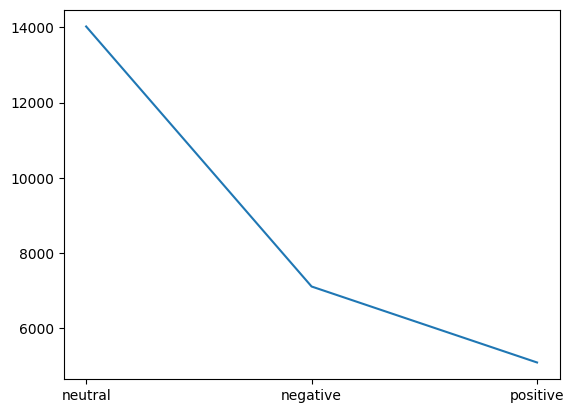

In [9]:
# Plot a Line Graph

x = fin_data_df['Sentiment'].unique()
y = fin_data_df['Sentiment'].value_counts()

print(x)
print(y)
plt.plot(x, y)